### Network processing and visualization with networkx

In [1]:
# libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
 
# Build a dataframe with your connections
df = pd.DataFrame({ 'from':['A', 'B', 'C','A','E','F','E','G','G','D','F'], 'to':['D', 'A', 'E','C','A','F','G','D','B','G','C']})

print(df)

   from to
0     A  D
1     B  A
2     C  E
3     A  C
4     E  A
5     F  F
6     E  G
7     G  D
8     G  B
9     D  G
10    F  C


Networkx plot function and automatic layouts
https://networkx.org/documentation/stable/reference/drawing.html#module-networkx.drawing.layout

In [2]:
# Build the graph from link table

G = nx.from_pandas_edgelist(df, 'from', 'to')


Visualization with fixed layouts. Are they deterministic?

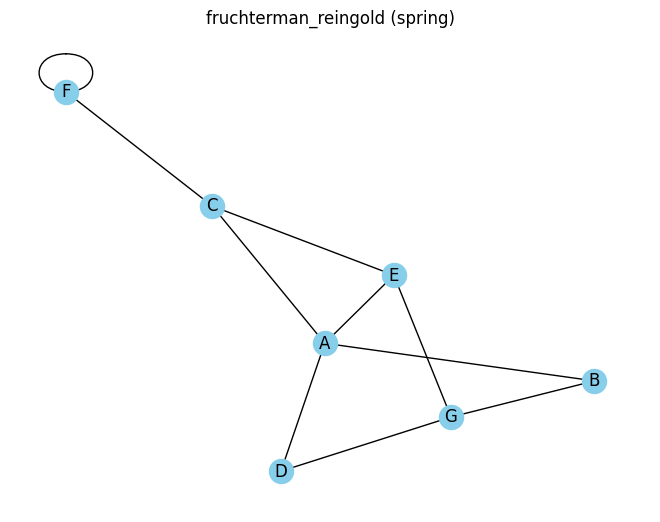

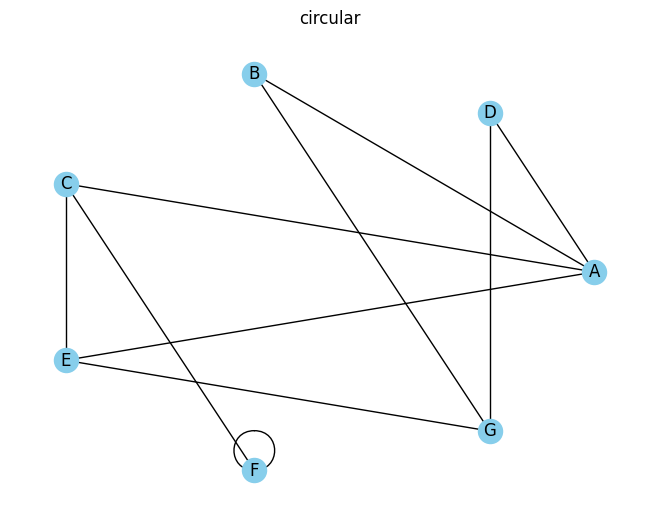

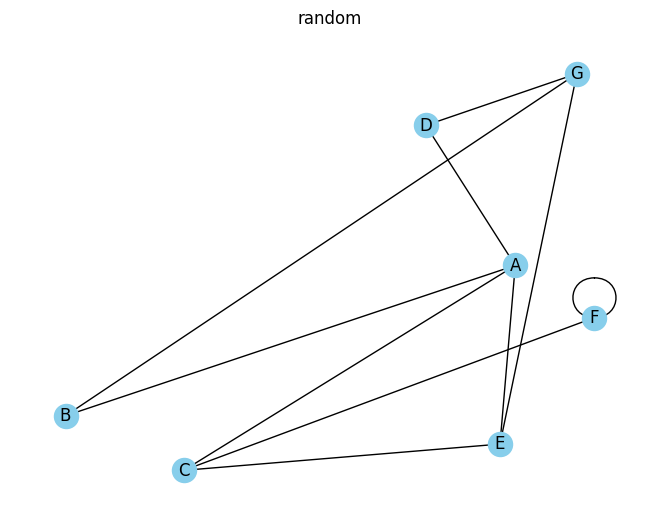

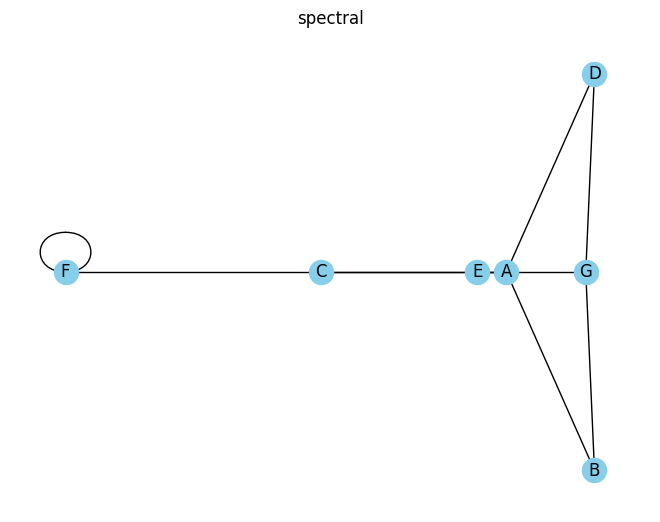

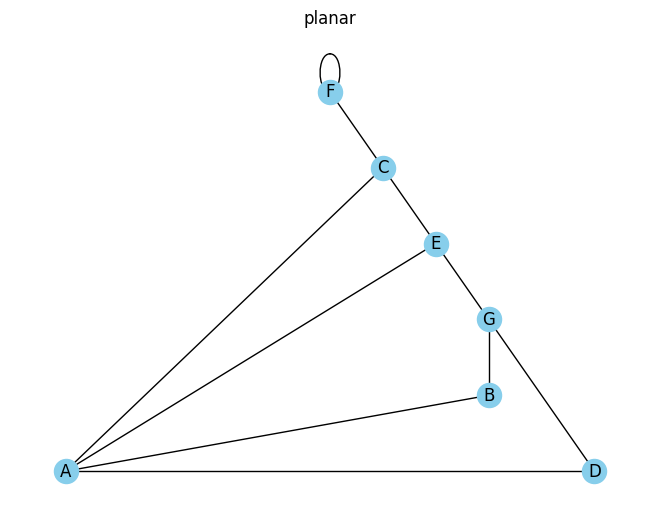

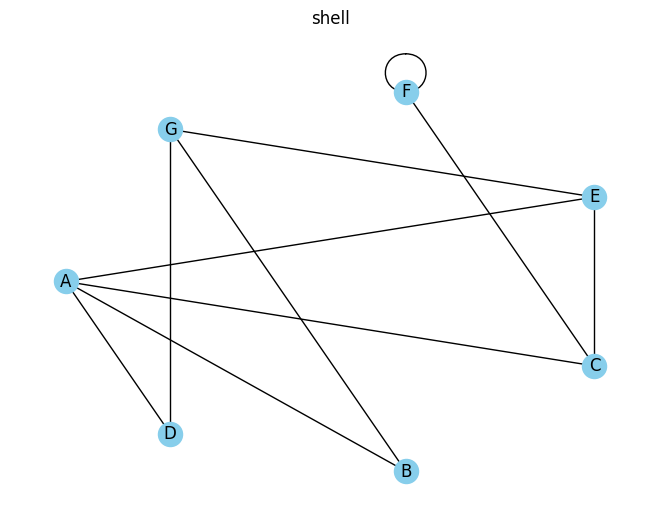

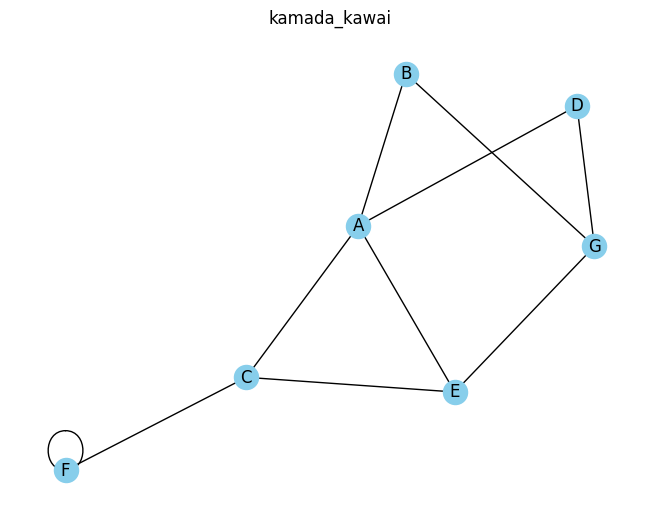

In [3]:
# Fruchterman Reingold (same as spring)
nx.draw(G, with_labels=True, node_color="skyblue", pos=nx.fruchterman_reingold_layout(G))
plt.title("fruchterman_reingold (spring)")
plt.show()
 
# Circular
nx.draw(G, with_labels=True, node_color="skyblue", pos=nx.circular_layout(G))
plt.title("circular")
plt.show()
 
# Random
nx.draw(G, with_labels=True, node_color="skyblue", pos=nx.random_layout(G))
plt.title("random")
plt.show()
 
# Spectral
nx.draw(G, with_labels=True, node_color="skyblue", pos=nx.spectral_layout(G))
plt.title("spectral")
plt.show()

# planar
nx.draw(G, with_labels=True, node_color="skyblue", pos=nx.planar_layout(G))
plt.title("planar")
plt.show()

# Shell
nx.draw(G, with_labels=True, node_color="skyblue", pos=nx.shell_layout(G))
plt.title("shell")
plt.show()

# Spiral
nx.draw(G, with_labels=True, node_color="skyblue", pos=nx.kamada_kawai_layout(G))
plt.title("kamada_kawai")
plt.show()




Attributes on nodes. We can estimate centrality values

[(0, 16), (1, 9), (2, 10), (3, 6), (4, 3), (5, 4), (6, 4), (7, 4), (8, 5), (9, 2), (10, 3), (11, 1), (12, 2), (13, 5), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 3), (20, 2), (21, 2), (22, 2), (23, 5), (24, 3), (25, 3), (26, 2), (27, 4), (28, 3), (29, 4), (30, 4), (31, 6), (32, 12), (33, 17)]


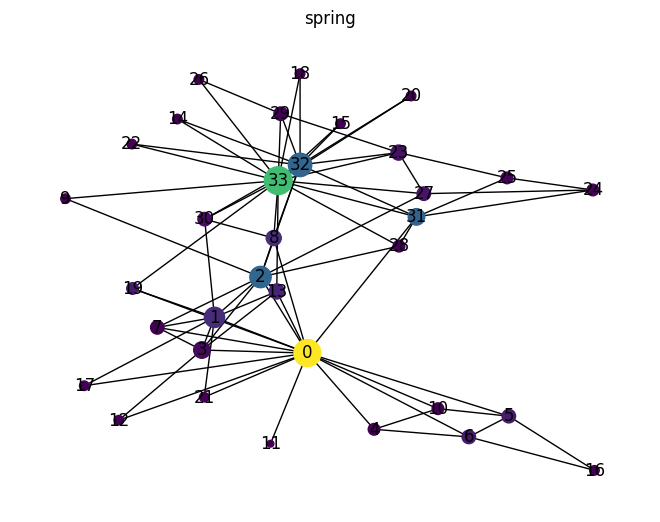

In [4]:
G = nx.karate_club_graph() 
deg = nx.degree(G)
dcent = nx.degree_centrality(G)
bcent = nx.betweenness_centrality(G)
ccent = nx.closeness_centrality(G)


print(deg)
#need to extract Create a 1-dimensional array from an iterable object.
bcentrality = np.fromiter(bcent.values(), float)
degs = np.fromiter(dcent.values(), float)
sizes = degs / np.max(degs) * 400

# Spring
nx.draw(G, with_labels=True, node_size=sizes, node_color=bcentrality, pos=nx.spring_layout(G))
plt.title("spring")
plt.show()


(array([12., 12.,  3.,  2.,  0.,  2.,  1.,  0.,  0.,  2.]),
 array([0.03030303, 0.07878788, 0.12727273, 0.17575758, 0.22424242,
        0.27272727, 0.32121212, 0.36969697, 0.41818182, 0.46666667,
        0.51515152]),
 <BarContainer object of 10 artists>)

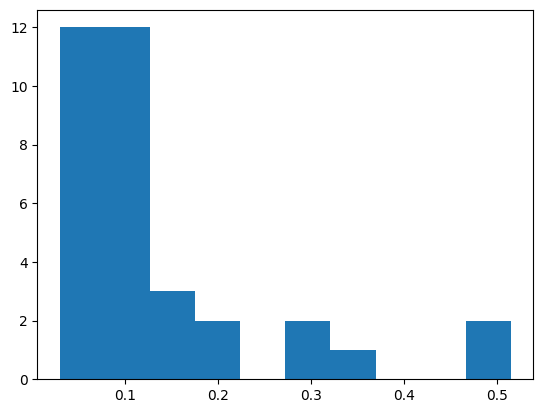

In [5]:
#we can also plot the distributions
plt.hist(degs)


(array([26.,  3.,  0.,  3.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([0.        , 0.04376353, 0.08752706, 0.13129058, 0.17505411,
        0.21881764, 0.26258117, 0.3063447 , 0.35010823, 0.39387175,
        0.43763528]),
 <BarContainer object of 10 artists>)

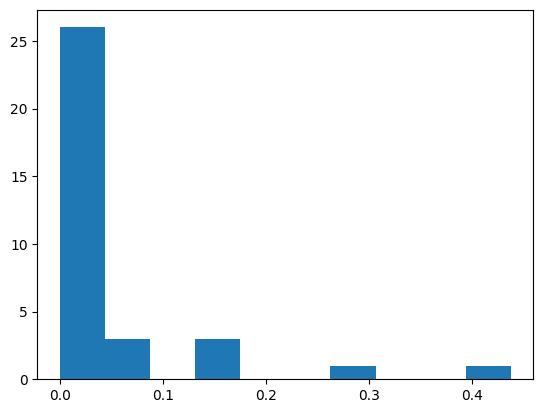

In [6]:
plt.hist(bcentrality)

example from networkx: processing removing nodes, computing attributes, improving graph readability

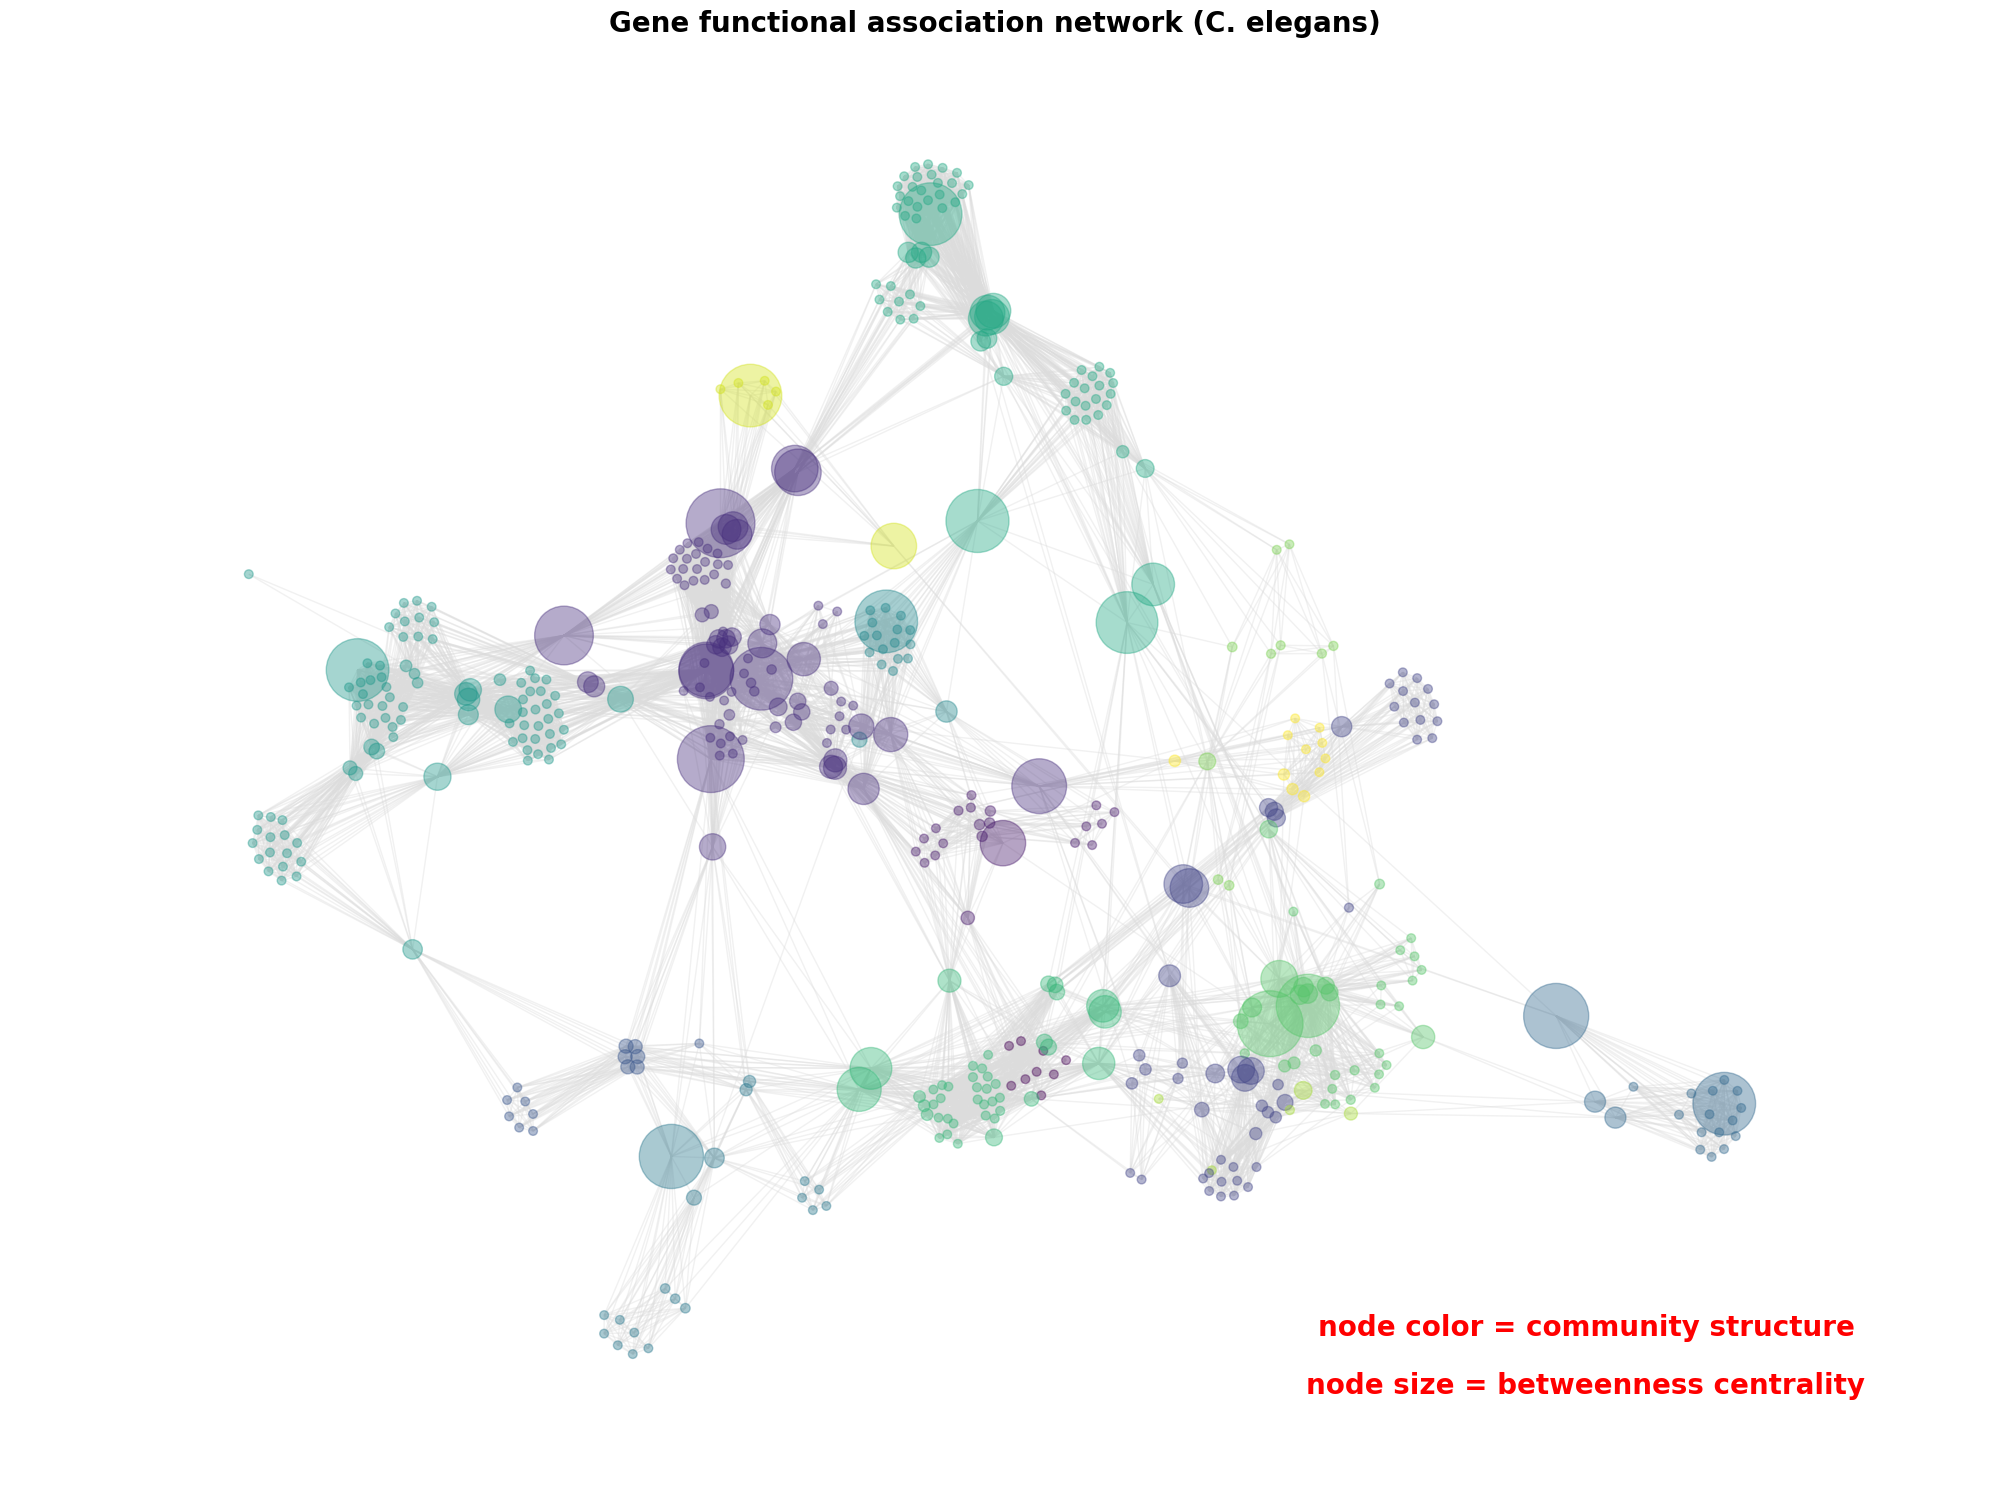

In [7]:
from random import sample
import networkx as nx
import matplotlib.pyplot as plt

# Gold standard data of positive gene functional associations
# from https://www.inetbio.org/wormnet/downloadnetwork.php
G = nx.read_edgelist("WormNet.v3.benchmark.txt")

# remove randomly selected nodes (to make example fast)
num_to_remove = int(len(G) / 1.5)
nodes = sample(list(G.nodes), num_to_remove)
G.remove_nodes_from(nodes)

# remove low-degree nodes
low_degree = [n for n, d in G.degree() if d < 10]
G.remove_nodes_from(low_degree)

# largest connected component
components = nx.connected_components(G)
largest_component = max(components, key=len)
H = G.subgraph(largest_component)

# compute centrality
centrality = nx.betweenness_centrality(H, k=10, endpoints=True)

# compute community structure
# algorithms to divide networks into groups of nodes with dense connections 
# internally and sparser connections between groups

lpc = nx.community.label_propagation_communities(H)
community_index = {n: i for i, com in enumerate(lpc) for n in com}

#### draw graph ####
fig, ax = plt.subplots(figsize=(20, 15))
pos = nx.spring_layout(H, k=0.15, seed=4572321)
node_color = [community_index[n] for n in H]
node_size = [v * 20000 for v in centrality.values()]
nx.draw_networkx(
    H,
    pos=pos,
    with_labels=False,
    node_color=node_color,
    node_size=node_size,
    edge_color="gainsboro",
    alpha=0.4,
)

# Title/legend
font = {"color": "k", "fontweight": "bold", "fontsize": 20}
ax.set_title("Gene functional association network (C. elegans)", font)
# Change font color for legend
font["color"] = "r"

ax.text(
    0.80,
    0.10,
    "node color = community structure",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)
ax.text(
    0.80,
    0.06,
    "node size = betweenness centrality",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)

# Resize figure for label readability
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off")
plt.show()

### nxviz provides nice plots

/Users/khoimai/Documents/vrn/data-viz/.venv/lib/python3.9/site-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.0 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.0, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(
/Users/khoimai/Documents/vrn/data-viz/.venv/lib/python3.9/site-packages/nxviz/api.py:265: UserWarning: As of nxviz 0.7, the object-oriented API is being deprecated in favour of a functional API. Please consider switching your plotting code! The object-oriented API wrappers remains in place to help you transition over. A few changes between the old and new API exist; please consult 

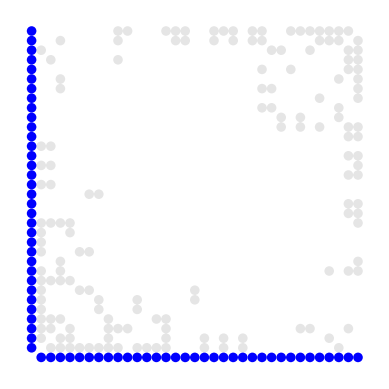

In [8]:
import nxviz as nv 
G = nx.karate_club_graph() 

nv.MatrixPlot(G)



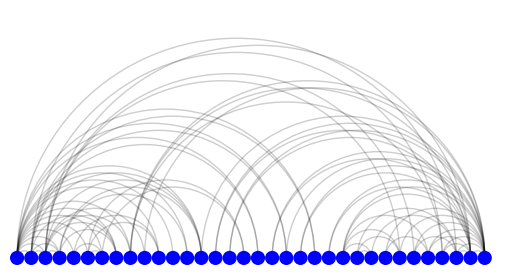

In [9]:
nv.ArcPlot(G)


In [10]:
#how to add attributes on nodes!

for n, d in G.nodes(data=True):
        G.nodes[n]['degree'] = nx.degree(G, n)

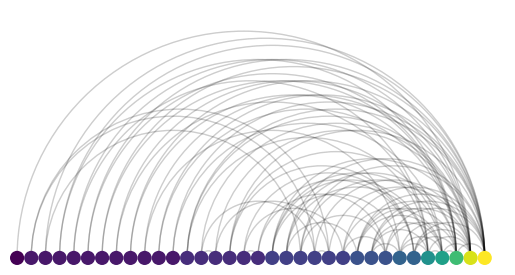

In [11]:
#nv.ArcPlot(G,node_order='degree',node_color='degree')
a = nv.ArcPlot(G,node_order='degree',node_color='degree')



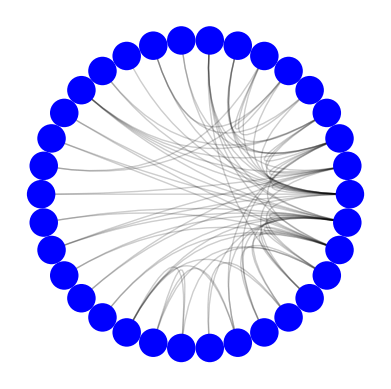

In [12]:
nv.CircosPlot(G)

Organize tree visualization


In [13]:
# Build a dataframe with your connections
df = pd.DataFrame({ 'from':['A', 'A', 'A','B','B','C','C'], 'to':['B', 'C', 'D', 'E','F','G','H']})
G=nx.from_pandas_edgelist(df, 'from', 'to')
df

,from,to
0,A,B
1,A,C
2,A,D
3,B,E
4,B,F
5,C,G
6,C,H


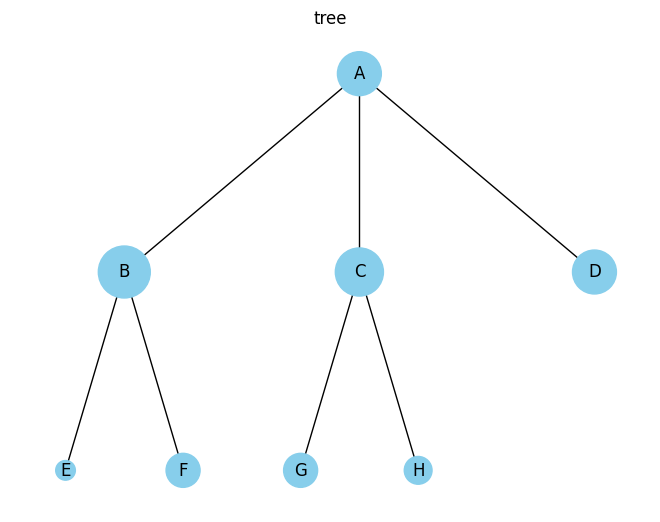

In [14]:
def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):

    '''
    From Joel's answer at https://stackoverflow.com/a/29597209/2966723.  
    Licensed under Creative Commons Attribution-Share Alike 
    
    If the graph is a tree this will return the positions to plot this in a 
    hierarchical layout.
    
    G: the graph (must be a tree)
    
    root: the root node of current branch 
    - if the tree is directed and this is not given, 
      the root will be found and used
    - if the tree is directed and this is given, then 
      the positions will be just for the descendants of this node.
    - if the tree is undirected and not given, 
      then a random choice will be used.
    
    width: horizontal space allocated for this branch - avoids overlap with other branches
    
    vert_gap: gap between levels of hierarchy
    
    vert_loc: vertical location of root
    
    xcenter: horizontal location of root
    '''
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        '''
        see hierarchy_pos docstring for most arguments

        pos: a dict saying where all nodes go if they have been assigned
        parent: parent of this branch. - only affects it if non-directed

        '''
    
        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos

            
    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)

values=[1000, 1400, 1200, 1000, 200, 600, 600, 400]
# Random
pos = hierarchy_pos(G,'A')   
nx.draw(G, with_labels=True, node_size=values, node_color="skyblue", pos=pos)


plt.title("tree")
plt.show()

<h3> Treemap in plotly

In [15]:
import pandas as pd
import numpy as np

import plotly.express as px

In [16]:
fig = px.treemap(
    names = ["A", "B", "C","D","E","F","G","H"],
    parents=["", "A", "A", "A", "B", "B", "C", "C" ],
    values=[10, 20, 12, 10, 2, 6, 6, 4]
)
  
fig.show()

In [17]:
#from tables (rectangular dataframe), hierarchy defined by path of categorical values

import plotly.express as px
df = px.data.tips()
fig = px.treemap(df, path=[px.Constant("all"), 'day', 'time', 'sex'], values='total_bill')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [18]:
#color from a different variable

import plotly.express as px
import numpy as np
df = px.data.gapminder().query("year == 2007")
fig = px.treemap(df, path=[px.Constant("world"), 'continent', 'country'], values='pop',
                  color='lifeExp', hover_data=['iso_alpha'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df['lifeExp'], weights=df['pop']))
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

Sunburst in plotly

In [19]:
fig = px.sunburst(
    names = ["A", "B", "C","D","E","F","G","H"],
    parents=["", "", "A", "A", "B", "B", "C", "C" ],
    values=[10, 14, 12, 10, 2, 6, 6, 4]
)
fig.show()

#see many options on https://plotly.com/python/sunburst-charts/

from rectangular dataframe

In [20]:
#use of path with categorical values to define the hierarchy
import plotly.express as px
df = px.data.tips()
fig = px.sunburst(df, path=['day', 'time', 'sex'], values='total_bill')
fig.show()

 icicle plot

In [21]:
import plotly.express as px
df = px.data.tips()
fig = px.icicle(df, path=[px.Constant("all"), 'day', 'time', 'sex'], values='total_bill')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

Building node-link diagram with plotly (scatter plot)

In [22]:
import plotly.graph_objects as go
G = nx.random_geometric_graph(200, 0.125)

edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

In [23]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()